In [18]:
import matplotlib.pyplot as plt
import numpy as np  
import seaborn as sns
import pandas as pd
import yfinance as yf

In [19]:
acoes = ["^BVSP", "EGIE3.SA", "PETR4.SA", "VALE3.SA", "ITUB4.SA", "BBDC3.SA"]

dados=yf.download(acoes, period="10y")['Close']

dados

C:\Users\ferre\AppData\Local\Temp\ipykernel_13580\61981686.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dados=yf.download(acoes, period="10y")['Close']
[*********************100%***********************]  6 of 6 completed


Ticker,BBDC3.SA,EGIE3.SA,ITUB4.SA,PETR4.SA,VALE3.SA,^BVSP
Date,,,,,,
2015-07-20,7.553106,16.225174,12.571012,3.816591,9.420735,51600.0
2015-07-21,7.523113,16.759672,12.465579,3.795367,9.551352,51474.0
2015-07-22,7.504021,16.727964,12.270931,3.664493,9.409851,50916.0
2015-07-23,7.165905,16.225174,11.759979,3.579601,9.426176,49807.0
2015-07-24,7.176814,15.844685,11.707261,3.547767,9.137733,49246.0
...,...,...,...,...,...,...
2025-07-14,13.820000,42.500000,34.900002,32.200001,55.360001,135299.0
2025-07-15,13.830000,41.730000,35.020000,31.950001,53.910000,135250.0
2025-07-16,13.770000,41.700001,35.189999,31.790001,54.400002,135511.0


<Axes: title={'center': 'Desempenho Relativo Ibovespa'}, xlabel='Date'>

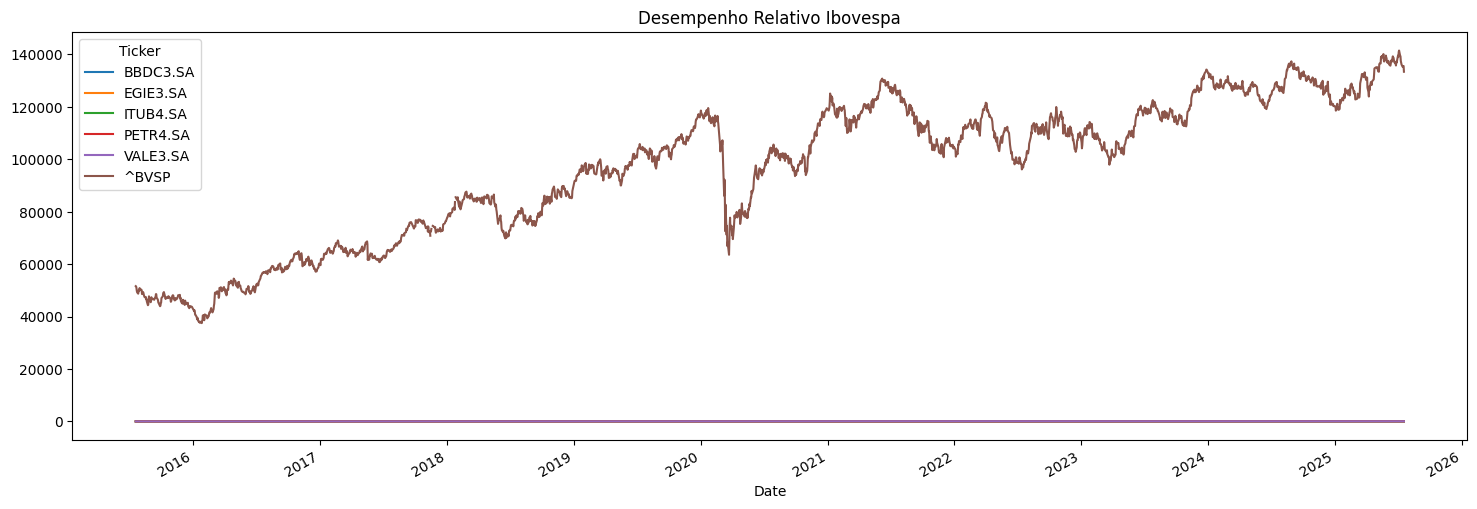

In [20]:
dados_normalizados = dados / dados.iloc[0]

dados.plot(figsize=(18, 6),title="Desempenho Relativo Ibovespa")


C:\Users\ferre\AppData\Local\Temp\ipykernel_13580\1548655712.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  retorno=dados.pct_change().dropna()


<Axes: title={'center': 'Retorno Acumulado Ibovespa'}, xlabel='Date'>

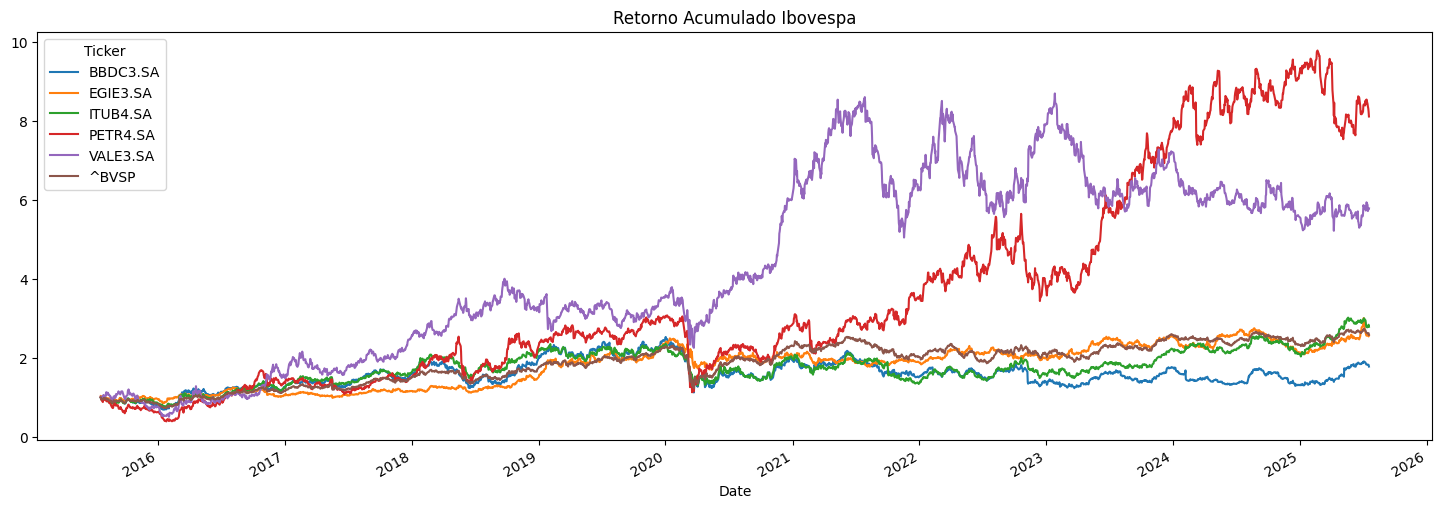

In [21]:
retorno=dados.pct_change().dropna()

retorno_acumulado=(1+retorno).cumprod()

retorno_medio_anual = (1 + retorno.mean())**252 - 1

# Calcular volatilidade primeiro
volatilidade = retorno.std() * np.sqrt(252)

# Depois calcular Sharpe
sharpe = retorno_medio_anual / volatilidade

retorno_acumulado.plot(figsize=(18, 6),title="Retorno Acumulado Ibovespa")  

<Axes: title={'center': 'Índice de Sharpe dos Ativos'}, xlabel='Ticker'>

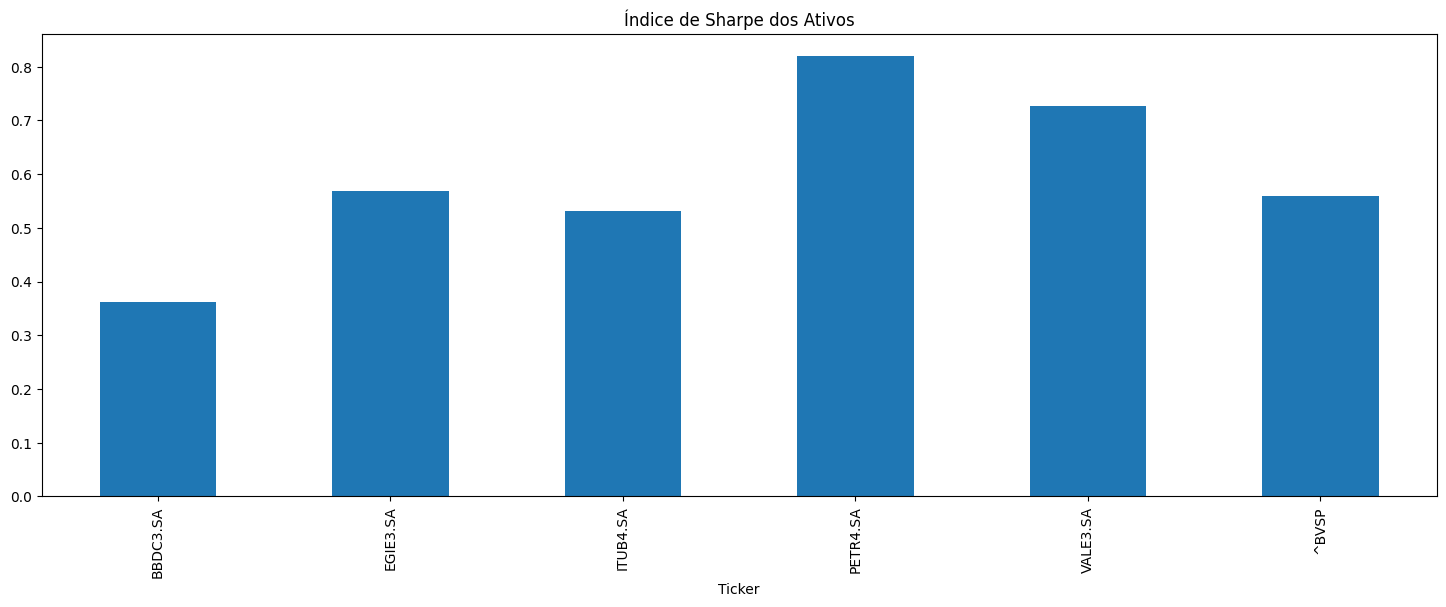

In [22]:
# Plotar
sharpe.plot(kind='bar', figsize=(18, 6), title="Índice de Sharpe dos Ativos")

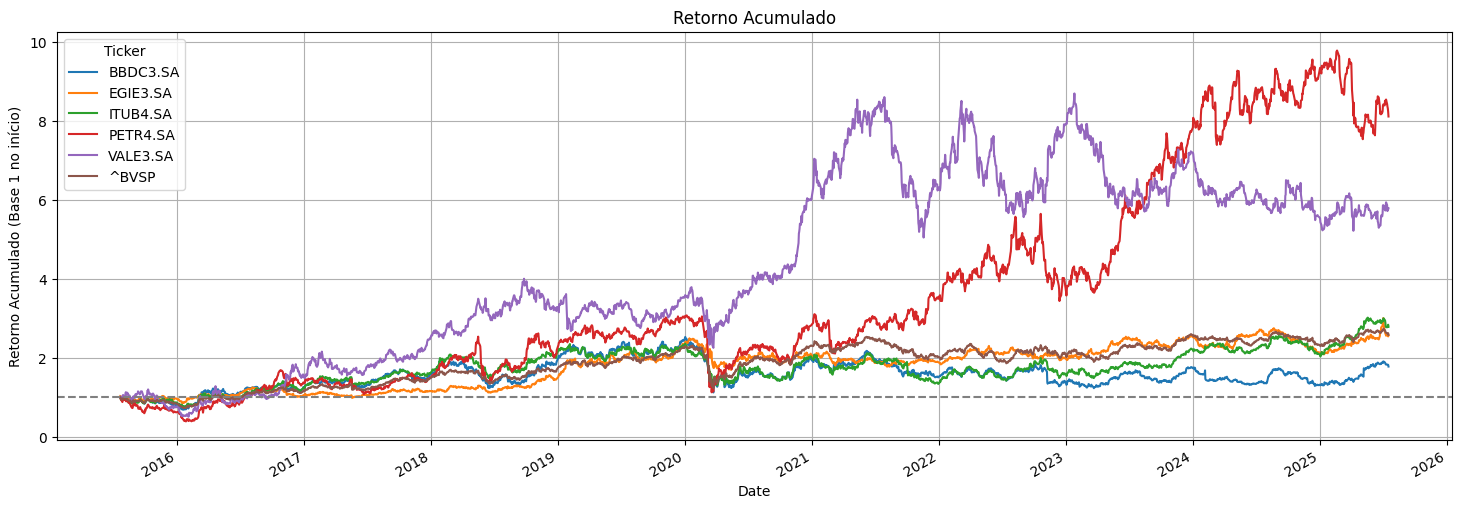

In [23]:
# Gráfico de retorno acumulado com linha horizontal em 1
retorno_acumulado.plot(figsize=(18, 6), title="Retorno Acumulado")
plt.axhline(y=1, color='gray', linestyle='--')
plt.ylabel("Retorno Acumulado (Base 1 no início)")
plt.grid(True)

<Axes: title={'center': 'Volatilidade Anualizada dos Ativos'}, xlabel='Ticker'>

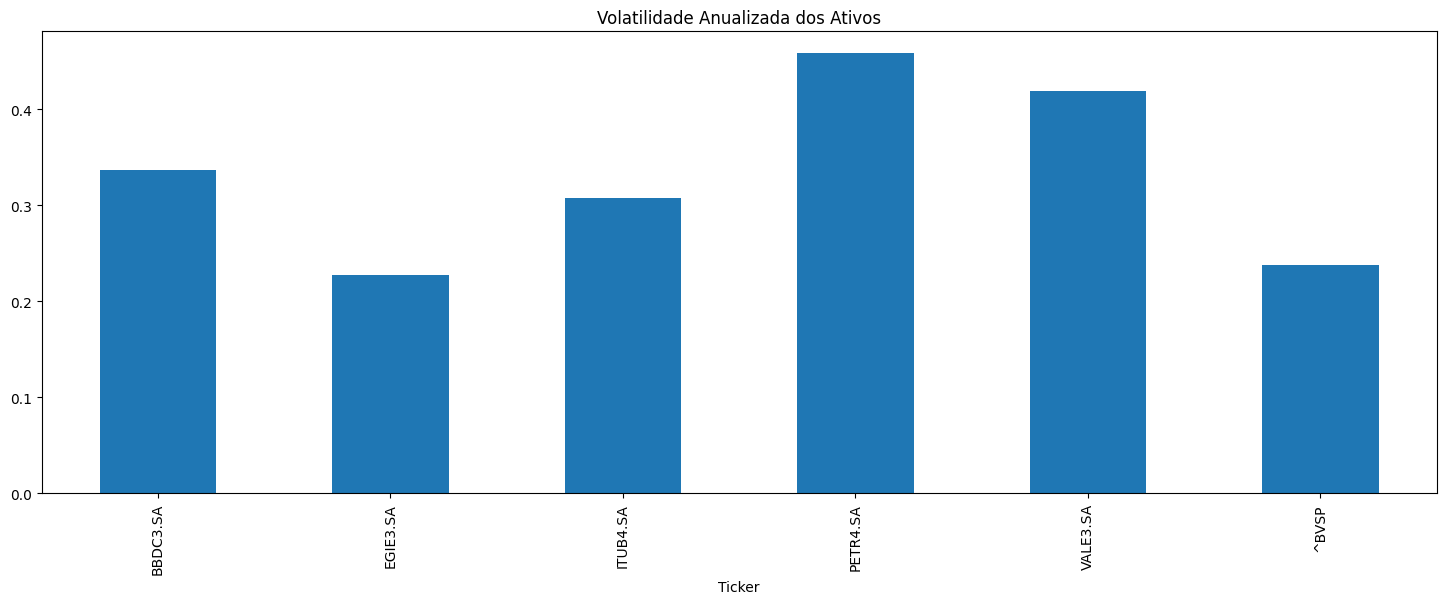

In [24]:
volatilidade = retorno.std() * np.sqrt(252)

volatilidade.plot(kind='bar', figsize=(18, 6), title="Volatilidade Anualizada dos Ativos")

Text(0.5, 1.0, 'Matriz de Correlação dos Retornos')

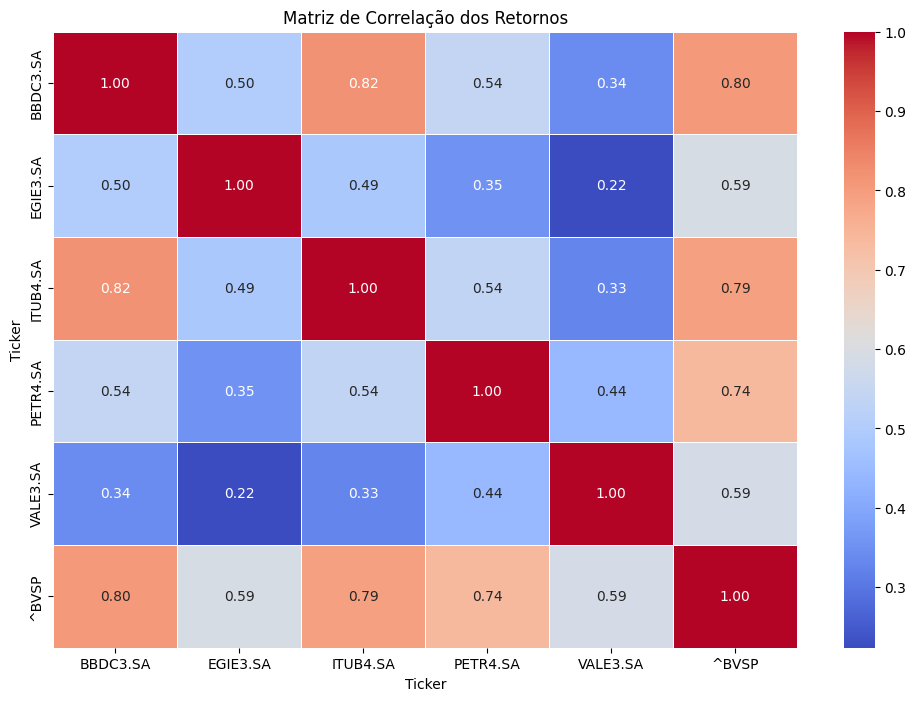

In [25]:
#Analise de Correlação
correlacao = retorno.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(retorno.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlação dos Retornos")

In [26]:
print("Principais conclusões:")
print(f"- Melhor retorno: {retorno_acumulado.iloc[-1].idxmax()} com {retorno_acumulado.iloc[-1].max():.2f}x")
print(f"- Menor volatilidade: {volatilidade.idxmin()} com {volatilidade.min():.2%}")
print(f"- Melhor Sharpe Ratio: {sharpe.idxmax()} com {sharpe.max():.2f}")

Principais conclusões:
- Melhor retorno: PETR4.SA com 8.12x
- Menor volatilidade: EGIE3.SA com 22.69%
- Melhor Sharpe Ratio: PETR4.SA com 0.82
